In [3]:
# № 1

def qZ(x, y):
    return (x + 3 * y) / (3 * x ** 2 + y ** 2 + 1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = X[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z

def evoSteps(X, Y, stepsNum = 4):
    results = []
    for i in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, results

X = [-1, 0, 2, 4]
Y = [-2, 1, -1, 0]
results = evoSteps(X, Y)
for i in range(len(results[2])):
    print(f"Max in {i + 1} step: {results[2][i][2]}")
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f"Max quality: {max(qualityArrZ)}")

Max in 1 step: 0.6352040816326531
Max in 2 step: 0.3138461538461539
Max in 3 step: 0.17020408163265308
Max in 4 step: 0.3816326530612245
Max quality: 1.5


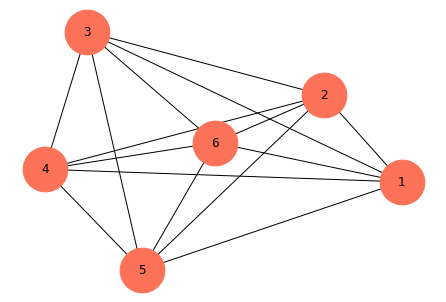

In [2]:
# № 2

from math import e
import networkx as nx

distances = [(1, 2, 17),
            (1, 3, 39),
            (1, 4, 32),
            (1, 5, 28),
            (1, 6, 18),
            (2, 3, 24),
            (2, 4, 28),
            (2, 5, 35),
            (2, 6, 13),
            (3, 4, 25),
            (3, 5, 43),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 16),
            (5, 6, 24)]
V = [1, 5, 2, 6, 3, 4, 1]
Z = [(3, 4), 
     (4, 5), 
     (5, 2), 
     (6, 2)]
P = [78, 79, 25, 82]
T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    return prevT * 0.5

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color="#fb7258", node_size=2000, with_labels=True)

def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum


Best route: [1, 3, 6, 2, 5, 4, 1]
Best route length: 162
All lengths: [156, 146, 159, 162, 178]


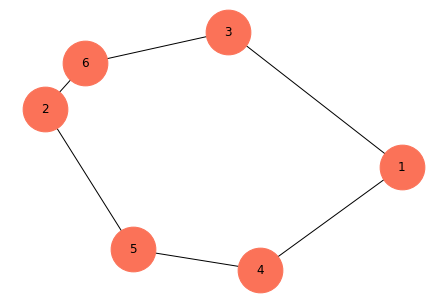

In [3]:

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color="#fb7258", node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f"Best route: {bestRoute}")
print(f"Best route length: {routeLength(bestRoute, distances)}")
print(f"All lengths: {arrLength}")
drawRouteGraph(distances, bestRoute)